In [285]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy as sc
import mpmath as mp

In [286]:
def f(x):
    return mp.sqrt(x+1)

In [287]:
def w(t):
    return mp.sqrt((1-t**2))

In [288]:
base_functions = [lambda x: 1, lambda x: x, lambda x: 2*x**2 -1]

In [289]:
def transform_cheb(nodes, a, b):
    for i in range(len(nodes)):
        nodes[i] = ((b-a)/2) * nodes[i] + (a+b)/2
    return nodes
    return (b-a)/2 * t + (a+b)/2
#calculates n standard chebyshew points on interval[1,1]
  
def get_nodes_cheb(n):
    nodes = np.empty(shape=n, dtype=float)
    for i in range(n):
        nodes[i] = mp.cos((mp.pi*(i+0.5))/n)
    return nodes

In [290]:
def polynomial_value(x, c):
    sol = 0.0
    for i in range(3):
        sol += c[i]*base_functions[i](x)
    return sol


In [291]:
def horner(x,c):
    result = 0 
    for i in range(len(c)-1,-1,-1):
        result = (result*x) + c[i]
    return result

In [292]:
c = np.zeros(3)

cheb_points = get_nodes_cheb(3)
# cheb_points2= transform_cheb(cheb_points, 0, 2);
# print(cheb_points)


for i in range(3):
    # print((lambda x: w(cheb_points[i])*(lambda x : f(x)*base_functions[i](x))(x))(0.2))
    c[i] = integrate.quad(lambda x: w(cheb_points[i])*(lambda x : f(x)*base_functions[i](x))(x), -1, 1)[0]\
        /integrate.quad(lambda x: w(cheb_points[i])*(lambda x : base_functions[i](x)*base_functions[i](x))(x), -1, 1)[0]
    print(c[i])
    


0.9428090415820631
0.5656854249492377
-0.7503990330959758


[-0.3732754164631503, -0.03155524139175592, 0.2801489723557996, 0.561837224779516, 0.8135095158793935, 1.035165845655432, 1.2268062141076312, 1.3884306212359918, 1.520039067040513, 1.6216315515211954, 1.6932080746780387, 1.734768636511043, 1.7463132370202084, 1.7278418762055345, 1.6793545540670218, 1.6008512706046703, 1.4923320258184796, 1.3537968197084493, 1.185245652274581, 0.9866785235168734]


<function matplotlib.pyplot.show(close=None, block=None)>

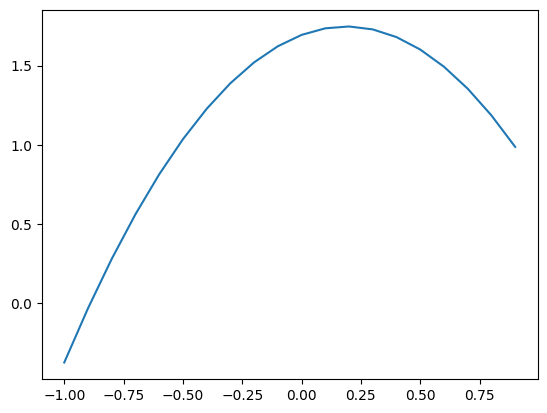

In [293]:
x_space = np.arange(-1, 1, 0.1)
y_space = [polynomial_value(x, c) for x in x_space]
print(y_space)
plt.plot(x_space, y_space)
plt.show